# Project: Wrangling and Analyze Data

In [369]:
# Import libraries as needed

import pandas as pd
import numpy as np
import requests
import os
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

I have downloaded and manually uploaded the file into the Jupyter Notebool workspace.

In [370]:
# Reading in the csv file for the Twitter archive

df_twarchive = pd.read_csv('twitter_archive_enhanced.csv')

In [371]:
# Display a few lines to see if the import was correct
df_twarchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [372]:
# Creating a folder in case there isn't one yet
folder_name = 'req_files'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [373]:
# Create request for the download
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [374]:
# Check if request worked (response should be 200)
response

<Response [200]>

In [375]:
# Access content and save in a file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [376]:
# Check contents of the folder
os.listdir('req_files')

['image-predictions.tsv']

In [377]:
# Read in tsv file and check
df_img_pred = pd.read_csv('req_files/image-predictions.tsv', sep='\t')

In [378]:
# Checking if the import was done correctly

df_img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

**Note:** Alas, I was not able to connect my Twitter developer account correctly due to API version changes. I created my developer account on the (only available) essential level and was not successful upgrading it to the necessary enhanced level. These levelled accounts belong to the newer 2.0 version of the Twitter API, however, and the code provided only works with the standard API (v1.1). Therefore, I will be using the Twitter API data that is available as a txt file on Udacity.

In [379]:
# Reading in the JSON text file into a dataframe

with open('tweet-json.txt') as json_file:
    df_twapi = pd.read_json(json_file, lines=True)

In [380]:
# Checking if the import was done correctly

df_twapi.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmo

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



I will start by first visually, and then programmatically assessing each dataframe. 

**Data from the Twitter archive (df_twarchive)**

In [381]:
# Though this is not easily readable, I am displaying the whole dataframe and scroll through it to see major issues

df_twarchive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

I can see first hand that there are a few columns that seem to have a lot of missing values. I will confirm this programmatically in a moment.
Also, there are a few rows that have "None" as the dog's name. Line 22 has "such" as the dog's name which doesn't feel correct. Same with rows 2326 and 2327, which have "quite" and "a", and a few other rows.

With the dog categories in the last four columns, these should be one columns with different values each. Some of them have two categories, I should take that into account.

In [382]:
# Checking the "source" value that's been shortened
df_twarchive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [383]:
# Displaying a summary for df_twarchive

df_twarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Okay, so we have 2.356 rows and 17 columns all in all, with missing (NaN) values in columns "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"; as I've noted from the visual assessment. Additionally, there are missing values in column "expanded_urls", which I haven't seen manually.

I can check the data types here as well, a few are incorrect:"tweet_id" is an integer and should be a string, as well as "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", which are floats now. "timestamp" and "retweeted_status_timestamp" should be a datetime object. Also, "rating_numerator" and "rating_denominator" should rather be float than int.

I will add that to the quality issues I've already listed.

In [384]:
# Checking for duplicate IDs, "0" means False means there are none

sum(df_twarchive.tweet_id.duplicated())

0

**Data from the image predictions file (df_img_pred)**

In [385]:
# Again, I am displaying the whole dataframe and scroll through it to see major issues

df_img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Immediately, I notice that some dog races are beginning with upper case character and some are lower case. Also, the column names are not easily readable.

? Should the trial rounds (p1, p2, p3) with their confidence levels be a separate table?

In [386]:
# Displaying a summary for df_img_pred

df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are 2.075 rows and 12 columns here with no missing values (yay!). There are some of the same issues as in the last data set: the id column should be a string, all others seem to be correct.

In [387]:
# Checking for duplicate IDs, "0" means False means there are none

sum(df_img_pred.tweet_id.duplicated())

0

**Data from the Twitter API (df_twapi)**

In [388]:
# Again, I am displaying the whole dataframe and scroll through it to see major issues

df_twapi

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmo

I'm noticing several issues: A few columns have missing values, I will check that in a moment programmatically. The column "user" consists of an array that just lists the id twice. Column "entities" should be a seperate table, as should  column "extended_entities". The column "display_text_range" could be called "tweet_length" and contain just one number instead of a range that always starts at zero. Column "created_at" contains both date and time, should be two seperate columns.


In [389]:
# Checking the "entities" value that's been shortened

df_twapi.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [390]:
# Checking the "extended_entities" value that's been shortened to see a difference

df_twapi.extended_entities[0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

Both "entities" columns contain a lot of information that should be seperate columns or even seperate tables (a media table, for example). Also, "extended_entities" seems to be part of "entities" and refers to media metadata.

Lastly, I want to check out the "possibly_sensitive" and "possible_sensitive_appealable" columns since they are partly shortened in the head() above and they don't seem to make too much sense with both being float and having quite a few NaN values.

In [391]:
# Calling for several samples of possibly_sensitive_appealable to get a feeling for the values

df_twapi.possibly_sensitive_appealable.sample(10)

2327    0.0
813     0.0
2246    0.0
1705    0.0
661     0.0
2014    0.0
320     0.0
1633    0.0
1757    0.0
1725    0.0
Name: possibly_sensitive_appealable, dtype: float64

In [392]:
# And the same for possibly_sensitive: Calling for several samples to get a feeling for the values

df_twapi.possibly_sensitive.sample(10)

1480    0.0
978     0.0
1263    0.0
1077    0.0
180     0.0
475     0.0
2005    0.0
1284    0.0
2268    0.0
1956    0.0
Name: possibly_sensitive, dtype: float64

Okay, I have a feeling that both columns consist of either NaN or zero values, let's check quickly:

In [393]:
# Building the mean for possibly_sensitive

df_twapi.possibly_sensitive.mean()

0.0

In [394]:
# Building the mean for possibly_sensitive_appealable

df_twapi.possibly_sensitive_appealable.mean()

0.0

That confirms my suspicion. These columns do not seem to make sense to me.

In [395]:
# Displaying a summary for df_twapi

df_twapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

All in all, there are 2.354 rows and 31 columns. Some of the columns are completely or almost completely empty. 

In [396]:
# Checking for duplicate IDs, "0" means False means there are none

sum(df_twapi.id.duplicated())

0

### Quality issues

1. **Duplicate or irrelevant columns** in df_twapi, there are several id columns listed twice, "id" and "id_str" for example, but they have the same values. The columns "possibly_sensitive" and "possibly_sensitive_appealable" don't have sensible values.

2. **Missing values** in two data sets. For df_twarchive: Missing values in columns "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" and "expanded_urls". For df_twapi: Missing values in columns "contributors", "coordinates", "geo", "place", "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str", "possibly_sensitive", "possibly_sensitive_appealable", "quoted_status", "quoted_status_id", "quoted_status_id_str", "retweeted_status", "extended_entities".

3. **Incorrect data types** in two data sets. For df_twarchive: All ID columns ("tweet_id", "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id") are incorrectly listed as int or float data types. For df_img_pred: "tweet_id" is incorrectly listed as int.

4. **Incorrect data types** For df_twarchive: "timestamp" and "retweeted_status_timestamp" are incorrectly listed as an object but should be datetime.

5. **Values are not consistently spelled** For df_img_pred: dogs' races in column "p1", "p2" and "p3" are sometimes uppercase, sometimes lowercase.

6. **Column headers are not easily readable** for df_img_pred, the column headers for the three guessing rounds are called "p1", "p2" and "p3" and thus are not easily understandable.

7. **Different names for id and datetime columns** for df_twarchive and df_img_pred, the id column is called "tweet_id", while for df_twapi_clean it is just called "id". For df_twapi the datetime column has a different name than the other two datasets.

8. **Incorrect data types for numerator/demoninator**: For df_twarchive, the columns "rating_numerator" and "rating_denominator" are fo datatype int but I have see in the tweet texts that they could be decimal numbers.

9. **Correct number of tweets**: Currently, there are retweets and original tweets in df_twarchive. FOr this project I only need the original tweets, not the retweets.

### Tidiness issues
1. **Column headers are values not variable names** For df_twarchive: The last four columns "doggo", "floofer", "pupper" and "poppo" refer to the same categorical dimension and should be one column with different values.

2. **Observational units stored in several tables** For all dataframes: There are several columns that are duplicated in other tables or refer to the same observational unit though displaying in a different table. In other words, all observations refer to tweet_ids.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [397]:
# Copying df_twarchive
df_twarchive_clean = df_twarchive.copy()

In [398]:
# Copying df_img_pred
df_img_pred_clean = df_img_pred.copy()

In [399]:
# Copying df_twapi
df_twapi_clean = df_twapi.copy()

### Quality Issue #1. Duplicate or irrelevant columns

#### Define:
In df_twapi, there are several id columns listed twice, "id" and "id_str" for example, but they have the same values. The columns "possibly_sensitive" and "possibly_sensitive_appealable" don't have sensible values.

I will start by dropping a few columns out of the df_twapi dataframe that are irrelevant for my analysis and keep just the following: "created_at", "display_text_range", "entities", "favorite_count", "favorited", "full_text", "id", "lang", "is_quote_status", "retweet_count".

#### Code

In [400]:
# Dropping columns in df_twapi_clean

df_twapi_clean.drop(['contributors', 'coordinates', 'display_text_range', 'entities', 'extended_entities', 'geo', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweeted', 'source', 'truncated', 'user'], axis=1, inplace=True)

#### Test

In [401]:
# Checking

df_twapi_clean.head()

,created_at,favorite_count,favorited,full_text,id,is_quote_status,lang,retweet_count,retweeted_status
0,2017-08-01 16:23:56,39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,False,en,8853,NaN
1,2017-08-01 00:17:27,33819,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",892177421306343426,False,en,6514,NaN
2,2017-07-31 00:18:03,25461,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,891815181378084864,False,en,4328,NaN
3,2017-07-30 15:58:51,42908,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,891689557279858688,False,en,8964,NaN
4,2017-07-29 16:00:24,41048,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",891327558926688256,False,en,9774,NaN


#### Define
Now the same for df_twarchive_clean, I will drop the following columns:

In [402]:
# Dropping columns in df_twarchive_clean

df_twarchive_clean.drop(['in_reply_to_status_id', 'source', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [403]:
df_twarchive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None


### Quality Issue #2. Missing values

#### Define
I will check if there are any more NaN values in these dataframes left after I dropped unnecessary columns.

#### Code

In [404]:
# Checking df_twapi_clean

df_twapi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 9 columns):
created_at          2354 non-null datetime64[ns]
favorite_count      2354 non-null int64
favorited           2354 non-null bool
full_text           2354 non-null object
id                  2354 non-null int64
is_quote_status     2354 non-null bool
lang                2354 non-null object
retweet_count       2354 non-null int64
retweeted_status    179 non-null object
dtypes: bool(2), datetime64[ns](1), int64(3), object(3)
memory usage: 133.4+ KB


In [405]:
# Checking df_twarchive_clean

df_twarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(7)
memory usage: 184.1+ KB


Both dataframes have no missing values that are NaN anymore.

### Quality Issue #3: Incorrect data types (str)

#### Define
For df_twarchive: The ID column "tweet_id" is incorrectly listed as int or float data types.
For df_img_pred: "tweet_id" is incorrectly listed as int. Both should be string data types. I will convert them as such.

#### Code

In [406]:
# Convert df_twarchive_clean.tweet_id
df_twarchive_clean['tweet_id'] = df_twarchive_clean['tweet_id'].astype(str)

In [407]:
# Convert df_twapi_clean.id
df_twapi_clean['id'] = df_twapi_clean['id'].astype(str)

In [408]:
# Convert df_img_pred_clean.tweet_id
df_img_pred_clean['tweet_id'] = df_img_pred_clean['tweet_id'].astype(str)

#### Test

In [409]:
df_twarchive_clean.tweet_id.dtypes

dtype('O')

In [410]:
df_twapi_clean.id.dtypes

dtype('O')

In [411]:
df_img_pred_clean.tweet_id.dtypes

dtype('O')

### Quality Issue #4: Incorrect data types (datetime)

#### Define
For df_twarchive_clean: "timestamp" is incorrectly listed as an object but should be datetime.

#### Code

In [412]:
df_twapi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 9 columns):
created_at          2354 non-null datetime64[ns]
favorite_count      2354 non-null int64
favorited           2354 non-null bool
full_text           2354 non-null object
id                  2354 non-null object
is_quote_status     2354 non-null bool
lang                2354 non-null object
retweet_count       2354 non-null int64
retweeted_status    179 non-null object
dtypes: bool(2), datetime64[ns](1), int64(2), object(4)
memory usage: 133.4+ KB


In [413]:
# Switch to correct date format for 'timestamp' in df_twarchive_clean
df_twarchive_clean['timestamp'] = pd.to_datetime(df_twarchive_clean['timestamp'])

#### Test

In [414]:
# Check if it worked in df_twarchive_clean
df_twarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 184.1+ KB


### Quality Issue #5: Values are not consistently spelled

#### Define
For df_img_pred: dogs' races in column "p1", "p2" and "p3" are sometimes uppercase, sometimes lowercase. Though this is not the best readability, I will convert all values for the three columns to lowercase characters.

#### Code

In [415]:
# Turn all values of p1 into lowercase characters

df_img_pred_clean.p1 = df_img_pred_clean.p1.str.lower()

In [416]:
# Turn all values of p2 into lowercase characters

df_img_pred_clean.p2 = df_img_pred_clean.p2.str.lower()

In [417]:
# Turn all values of p3 into lowercase characters

df_img_pred_clean.p3 = df_img_pred_clean.p3.str.lower()

#### Test

In [418]:
# Check if it worked as intended

df_img_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Quality Issue #6: Column headers are not easily readable

#### Define
For df_img_pred_clean, the column headers for the three guessing rounds are called "p1", "p2" and "p3" and thus are not easily understandable. I will rename them to "first_guess", "second_guess" and "third_guess" respectively, as well as change the corresponding confidence level columns also.

#### Code

In [419]:
# Renaming "p1" to "first_guess" and "p1_conf" to "first_guess_conf"

df_img_pred_clean.rename(columns={'p1':'first_guess'}, inplace=True)
df_img_pred_clean.rename(columns={'p1_conf':'first_guess_conf'}, inplace=True)
df_img_pred_clean.rename(columns={'p1_dog':'is_first_guess_dog'}, inplace=True)

In [420]:
# Renaming "p2" to "second_guess" and "p2_conf" to "second_guess_conf"

df_img_pred_clean.rename(columns={'p2':'second_guess'}, inplace=True)
df_img_pred_clean.rename(columns={'p2_conf':'second_guess_conf'}, inplace=True)
df_img_pred_clean.rename(columns={'p2_dog':'is_second_guess_dog'}, inplace=True)

In [421]:
# Renaming "p3" to "third_guess" and "p3_conf" to "third_guess_conf"

df_img_pred_clean.rename(columns={'p3':'third_guess'}, inplace=True)
df_img_pred_clean.rename(columns={'p3_conf':'third_guess_conf'}, inplace=True)
df_img_pred_clean.rename(columns={'p3_dog':'is_third_guess_dog'}, inplace=True)

#### Test

In [422]:
# Check if it worked as intended

df_img_pred_clean.head()

,tweet_id,jpg_url,img_num,first_guess,first_guess_conf,is_first_guess_dog,second_guess,second_guess_conf,is_second_guess_dog,third_guess,third_guess_conf,is_third_guess_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Quality Issue #7: Different names for id and datetime columns

#### Define
For df_twarchive_clean and df_img_pred_clean, the id column is called "tweet_id", while for df_twapi_clean it is just called "id". Since I will want to merge the three dataframes, the respective id columns need to have the same name. I will rename the id column in df_twapi_clean to match the other ones as "tweet_id".
I will also rename the "created_at" column to "timestamp".

#### Code

In [423]:
# Renaming the id column

df_twapi_clean.rename(columns={'id':'tweet_id'}, inplace=True)

In [424]:
# Renaming the "created_at" column

df_twapi_clean.rename(columns={'created_at':'timestamp'}, inplace=True)

#### Test

In [425]:
# Check if it worked as intended
df_twapi_clean.head()

,timestamp,favorite_count,favorited,full_text,tweet_id,is_quote_status,lang,retweet_count,retweeted_status
0,2017-08-01 16:23:56,39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193,False,en,8853,NaN
1,2017-08-01 00:17:27,33819,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",892177421306343426,False,en,6514,NaN
2,2017-07-31 00:18:03,25461,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,891815181378084864,False,en,4328,NaN
3,2017-07-30 15:58:51,42908,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,891689557279858688,False,en,8964,NaN
4,2017-07-29 16:00:24,41048,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",891327558926688256,False,en,9774,NaN


### Quality Issue #8: Incorrect data types for numerator/demoninator

#### Define
 For df_twarchive, the columns "rating_numerator" and "rating_denominator" are of datatype int but I have seen in the tweet texts that they could be decimal numbers. I will convert them both to float.

#### Code

In [426]:
# Checkign data types

df_twarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 184.1+ KB


In [427]:
# Convert denomimator to float

df_twarchive_clean.rating_denominator = df_twarchive_clean.rating_denominator.astype(float)

I also need to update the values that got lost in the "int" data type for the numerator.

In [428]:
# configuration to show full text
pd.set_option('display.max_colwidth', -1)

# filter only tweets with decimal numbers 
df_twarchive_clean[df_twarchive_clean.text.str.extract(r'(\d+\.\d+\/\d+)', expand=False).notnull()].text

45      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                         
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…                     
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1689    I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace                                                       
1712    Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD                                    

In [429]:
# Read only float values into temp. column, include "/10"
df_twarchive_clean['rating_tmp'] = df_twarchive_clean[df_twarchive_clean.text.str.extract(r'(\d+\.\d+\/\d+)', expand=False).notnull()].text.str.extract(r'(\d+\.\d+\/\d+)')

In [430]:
df_twarchive_clean.rating_tmp = df_twarchive_clean.rating_tmp[df_twarchive_clean.rating_tmp.notnull()].str[:-3]

In [431]:
# Transfer the corresponding float values to rating_numerator column
df_twarchive_clean.loc[df_twarchive_clean['rating_tmp'].notnull(), ['rating_numerator']] = df_twarchive_clean['rating_tmp']

In [432]:
# Drop temp column
df_twarchive_clean.drop(['rating_tmp'], axis=1, inplace=True)

In [433]:
# Convert numerator column to float

df_twarchive_clean.rating_numerator = df_twarchive_clean.rating_numerator.astype(float)

#### Test

In [434]:
# Check if it worked

df_twarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 184.1+ KB


### Quality Issue #9: Correct number of tweets

#### Define
Currently, there are retweets and original tweets in df_twarchive. FOr this project I only need the original tweets, not the retweets. I will look for null values in the column "retweeted_status_id" and filter out all filled value rows.

#### Code

In [435]:
# Check if "retweeted_status" column is null (then this is not a retweet)

sum(df_twapi_clean.retweeted_status.isnull())

2175

In [436]:
# Keep only the rows with null values

df_twapi_clean = df_twapi_clean[df_twapi_clean.retweeted_status.isnull() == True]

#### Test

In [437]:
# Check if there are any non null values in "retweeted_status"

sum(df_twapi_clean.retweeted_status.notnull())

0

### Tidiness Issue #1: Column headers are values not variable names

#### Define
For df_twarchive: The last four columns "doggo", "floofer", "pupper" and "poppo" refer to the same categorical dimension (aka "stages") and should be one column with different values. I will first check whether or not there is always only one value for each row, and then proceed to merge these four columns into one with different values.

#### Code

In [438]:
# Replace "None" values with empty cells for each of the four columns

df_twarchive_clean.doggo.replace('None', '', inplace = True)
df_twarchive_clean.floofer.replace('None', '', inplace = True)
df_twarchive_clean.pupper.replace('None', '', inplace = True)
df_twarchive_clean.puppo.replace('None', '', inplace = True)

In [439]:
# Create a new column and merge all values of the four columns together

df_twarchive_clean['dog_stages'] = df_twarchive_clean.doggo + df_twarchive_clean.floofer + df_twarchive_clean.pupper + df_twarchive_clean.puppo

In [440]:
# Replace empty cells with "No stage"

df_twarchive_clean.dog_stages.replace('', 'No stage', inplace = True)

In [441]:
# Merge together if there are mutliple values

df_twarchive_clean.loc[df_twarchive_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
df_twarchive_clean.loc[df_twarchive_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
df_twarchive_clean.loc[df_twarchive_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

In [442]:
# Drop the original four columns

df_twarchive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [443]:
# And last but not least change datatype to categorical

df_twarchive_clean['dog_stages'] = df_twarchive_clean['dog_stages'].astype("category")

#### Test

In [444]:
# Check if everything is correct

df_twarchive_clean.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages
845,766423258543644672,2016-08-18 23:55:18,This is Shadoe. Her tongue flies out of her mouth at random. Can't have a serious conversation with her. 9/10 https://t.co/Tytt15VquG,9.0,10.0,Shadoe,No stage
2197,668826086256599040,2015-11-23 16:18:59,This is Banditt. He is a brown LaBeouf retriever. Loves cold weather. 4 smaller dogs are his sons (probably). 10/10 https://t.co/Ko7eCsFpnI,10.0,10.0,Banditt,No stage
783,775350846108426240,2016-09-12 15:10:21,This is Maximus. A little rain won't stop him. He will persevere. 12/10 innovative af https://t.co/2OmDMAkkou,12.0,10.0,Maximus,No stage
1807,676916996760600576,2015-12-16 00:09:23,Super speedy pupper. Does not go gentle into that goodnight. 10/10 https://t.co/uPXBXS1XNb,10.0,10.0,None,pupper
1836,676098748976615425,2015-12-13 17:57:57,Extremely rare pup here. Very religious. Always praying. Too many legs. Not overwhelmingly fluffy. Won't bark. 3/10 https://t.co/REyE5YKVBb,3.0,10.0,None,No stage
2265,667534815156183040,2015-11-20 02:47:56,"This is Frank (pronounced ""Fronq""). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10 https://t.co/CpPxD28IpV",8.0,10.0,Frank,No stage
1417,698549713696649216,2016-02-13 16:50:04,This is Claude. He's trying to be seductive but he forgot to turn on the fireplace. 9/10 damn it Claude https://t.co/EPdQquc1dG,9.0,10.0,Claude,No stage
1918,674271431610523648,2015-12-08 16:56:51,"""AT DAWN, WE RIDE""\n10/10 for both dogs https://t.co/3aXX6wH6it",10.0,10.0,None,No stage
2020,672095186491711488,2015-12-02 16:49:14,This is Tuco. That's the toast that killed his father. 9/10 https://t.co/ujnWy26RMe,9.0,10.0,Tuco,No stage
1393,700029284593901568,2016-02-17 18:49:22,This is Coops. His ship is taking on water. Sound the alarm. Much distress. Requesting immediate assistance. 10/10 https://t.co/8Nuny4lLE3,10.0,10.0,Coops,No stage


In [445]:
df_twarchive_clean.dog_stages.value_counts()

No stage          1976
pupper            245 
doggo             83  
puppo             29  
doggo, pupper     12  
floofer           9   
doggo, puppo      1   
doggo, floofer    1   
Name: dog_stages, dtype: int64

In [446]:
df_twarchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
dog_stages            2356 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), object(3)
memory usage: 113.2+ KB


### Tidiness Issue #2: Observational units stored in several tables

#### Define
For all dataframes: There are several columns that are duplicated in other tables or refer to the same observational unit though displaying in a different table. I will merge all three data sets into one master dataframe, using the "tweet_id" as a key. As the Image prediction data set is my focus in the analysis, I will join the two other dataframes into that one using inner joints.

#### Code

In [447]:
# Merging df_twarchive_clean into df_img_pred_clean

inner_join_df = pd.merge(df_img_pred_clean, df_twarchive_clean, on='tweet_id', how='inner')
inner_join_df.sample(5)

,tweet_id,jpg_url,img_num,first_guess,first_guess_conf,is_first_guess_dog,second_guess,second_guess_conf,is_second_guess_dog,third_guess,third_guess_conf,is_third_guess_dog,timestamp,text,rating_numerator,rating_denominator,name,dog_stages
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,2015-11-16 00:30:50,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,10.0,10.0,a,No stage
1958,865359393868664832,https://pbs.twimg.com/media/DAJfxqGVoAAnvQt.jpg,2,chesapeake_bay_retriever,0.832435,True,labrador_retriever,0.163551,True,weimaraner,0.002770,True,2017-05-19 00:12:11,This is Sammy. Her tongue ejects without warning sometimes. It's a serious condition. Needs a hefty dose from a BlepiPen. 13/10 https://t.co/g20EmqK7vc,13.0,10.0,Sammy,No stage
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10.0,Jax,No stage
323,671874878652489728,https://pbs.twimg.com/media/CVL6op1WEAAUFE7.jpg,1,china_cabinet,0.996031,False,entertainment_center,0.001986,False,bookcase,0.001652,False,2015-12-02 02:13:48,This is Mia. She was specifically told not get on top of the hutch or play in the fridge. 10/10 what a rebel https://t.co/3J7wkwW4FG,10.0,10.0,Mia,No stage
1094,719991154352222208,https://pbs.twimg.com/media/Cf3sH62VAAA-LiP.jpg,2,golden_retriever,0.605304,True,cocker_spaniel,0.130948,True,labrador_retriever,0.094692,True,2016-04-12 20:50:42,This doggo was initially thrilled when she saw the happy cartoon pup but quickly realized she'd been deceived. 10/10 https://t.co/mvnBGaWULV,10.0,10.0,None,doggo


In [448]:
# Checking for duplicates

inner_join_df[inner_join_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,first_guess,first_guess_conf,is_first_guess_dog,second_guess,second_guess_conf,is_second_guess_dog,third_guess,third_guess_conf,is_third_guess_dog,timestamp,text,rating_numerator,rating_denominator,name,dog_stages


In [449]:
inner_join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 18 columns):
tweet_id               2075 non-null object
jpg_url                2075 non-null object
img_num                2075 non-null int64
first_guess            2075 non-null object
first_guess_conf       2075 non-null float64
is_first_guess_dog     2075 non-null bool
second_guess           2075 non-null object
second_guess_conf      2075 non-null float64
is_second_guess_dog    2075 non-null bool
third_guess            2075 non-null object
third_guess_conf       2075 non-null float64
is_third_guess_dog     2075 non-null bool
timestamp              2075 non-null datetime64[ns]
text                   2075 non-null object
rating_numerator       2075 non-null float64
rating_denominator     2075 non-null float64
name                   2075 non-null object
dog_stages             2075 non-null category
dtypes: bool(3), category(1), datetime64[ns](1), float64(5), int64(1), object(7)
memory usage

In [450]:
# Merging df_twapi_clean into inner_join_df, creating a df_twmaster

df_twmaster = pd.merge(inner_join_df, df_twapi_clean, on='tweet_id', how='inner')

#### Test

In [451]:
# Checking if it worked correctly

df_twmaster.sample(5)

,tweet_id,jpg_url,img_num,first_guess,first_guess_conf,is_first_guess_dog,second_guess,second_guess_conf,is_second_guess_dog,third_guess,...,name,dog_stages,timestamp_y,favorite_count,favorited,full_text,is_quote_status,lang,retweet_count,retweeted_status
1335,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,old_english_sheepdog,0.023791,True,komondor,...,Lilli,No stage,2016-07-29 02:40:28,3904,False,"This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW",False,en,1027,NaN
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,...,the,No stage,2015-11-16 01:01:59,115,False,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,False,en,61,NaN
866,697596423848730625,https://pbs.twimg.com/media/Ca5cPrJXIAImHtD.jpg,1,shetland_sheepdog,0.621668,True,collie,0.366578,True,pembroke,...,None,pupper,2016-02-11 01:42:02,3306,False,Here's a pupper with a piece of pizza. Two of everybody's favorite things in one photo. 11/10 https://t.co/5USjFjKI7Z,False,en,1425,NaN
365,672964561327235073,https://pbs.twimg.com/media/CVbZsouWUAIsxMc.jpg,1,chihuahua,0.292343,True,pug,0.173364,True,french_bulldog,...,Terry,No stage,2015-12-05 02:23:49,1530,False,This is Terry. He's a Toasty Western Sriracha. Doubles as a table. Great for parties. 10/10 would highly recommend https://t.co/1ui7a1ZLTT,False,en,701,NaN
1134,728986383096946689,https://pbs.twimg.com/media/Ch3hOGWUYAE7w0y.jpg,2,maltese_dog,0.952070,True,toy_poodle,0.027271,True,miniature_poodle,...,Puff,No stage,2016-05-07 16:34:32,3460,False,"This is Puff. He started out on the streets (first pic), but don't let the new smile fool you, still tough af. 11/10 https://t.co/kiuXRXcg4B",False,en,917,NaN


In [452]:
df_twmaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 26 columns):
tweet_id               1994 non-null object
jpg_url                1994 non-null object
img_num                1994 non-null int64
first_guess            1994 non-null object
first_guess_conf       1994 non-null float64
is_first_guess_dog     1994 non-null bool
second_guess           1994 non-null object
second_guess_conf      1994 non-null float64
is_second_guess_dog    1994 non-null bool
third_guess            1994 non-null object
third_guess_conf       1994 non-null float64
is_third_guess_dog     1994 non-null bool
timestamp_x            1994 non-null datetime64[ns]
text                   1994 non-null object
rating_numerator       1994 non-null float64
rating_denominator     1994 non-null float64
name                   1994 non-null object
dog_stages             1994 non-null category
timestamp_y            1994 non-null datetime64[ns]
favorite_count         1994 non-null int6

I noticed we still have two timestamp columns, which I will do a quick check to see if they are identical, then I will drop one and rename the other.

In [453]:
# Creating a new column that has Boole values for matching cells (True) or unmatching cells (False). False is also the default. 

df_twmaster['timestamp_match'] = np.select([df_twmaster.timestamp_x == df_twmaster.timestamp_y, df_twmaster.timestamp_x != df_twmaster.timestamp_y], [True, False], default=False)
df_twmaster.timestamp_match.value_counts()

True    1994
Name: timestamp_match, dtype: int64

In [454]:
# Dropping timestamp_x and timestamp_match

df_twmaster.drop(['timestamp_x', 'timestamp_match'], axis=1, inplace=True)

In [455]:
# And renaming the remaining timestamp column

df_twmaster.rename(columns={'timestamp_y':'timestamp'}, inplace=True)

In [456]:
# Checking once again

df_twmaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id               1994 non-null object
jpg_url                1994 non-null object
img_num                1994 non-null int64
first_guess            1994 non-null object
first_guess_conf       1994 non-null float64
is_first_guess_dog     1994 non-null bool
second_guess           1994 non-null object
second_guess_conf      1994 non-null float64
is_second_guess_dog    1994 non-null bool
third_guess            1994 non-null object
third_guess_conf       1994 non-null float64
is_third_guess_dog     1994 non-null bool
text                   1994 non-null object
rating_numerator       1994 non-null float64
rating_denominator     1994 non-null float64
name                   1994 non-null object
dog_stages             1994 non-null category
timestamp              1994 non-null datetime64[ns]
favorite_count         1994 non-null int64
favorited              1994 non-null bool
full_tex

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [457]:
# Save the master df into csv

df_twmaster.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

I can think of three questions right away that I will try to answer.

**1. Which dog breeds received the most favorites?**

In [458]:
df_fav_breeds = df_twmaster.query('is_quote_status == False and first_guess_conf > 0.5')
df_top3 = df_fav_breeds.nlargest(n=3, columns=['favorite_count'])
df_top3.first_guess

1218    labrador_retriever
1593    chihuahua         
1885    french_bulldog    
Name: first_guess, dtype: object

**2. How often does the prediction algorithm recognize a dog as actually a dog on the first guess?**

In [459]:
# Number of possible correct guesses is the number of tweets
len(df_twmaster)

1994

In [460]:
# Number of correct first guesses

len(df_twmaster.query('is_first_guess_dog == True'))

1477

In [461]:
# Calculate percentage of being correct in recognising a dog as a dog

percent_correct = len(df_twmaster.query('is_first_guess_dog == True')) / len(df_twmaster) *100
print("There is a", int(percent_correct), "% chance that the first guess has been correctly identified as a dog breed.")

There is a 74 % chance that the first guess has been correctly identified as a dog breed.


**3. What are the most common recognized actual dog breed according to the most common doggy stage?**
I'll do this analysis visually.

### Visualization

In [462]:
# What is the most common dog stage?

df_twmaster.dog_stages.value_counts()

No stage          1688
pupper            203 
doggo             63  
puppo             22  
doggo, pupper     9   
floofer           7   
doggo, puppo      1   
doggo, floofer    1   
Name: dog_stages, dtype: int64

In [463]:
import matplotlib.pyplot as plt
% matplotlib inline

df_dogstages = df_twmaster.loc[:,['first_guess', 'dog_stages', 'is_first_guess_dog']]
pupper = df_dogstages[df_dogstages['dog_stages'].str.contains('pupper')].query('is_first_guess_dog == True')

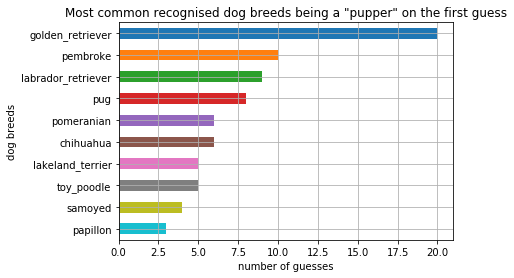

In [464]:
pupper.first_guess.value_counts().nlargest(n=10).plot(kind='barh').invert_yaxis();
#plt.legend('pupper');
plt.xlabel('number of guesses')
plt.ylabel('dog breeds')
plt.title('Most common recognised dog breeds being a "pupper" on the first guess')
plt.grid(True)

### Insights:
1. The top 3 most favorited tweets are showing a labrador retriever, a chihuahua and a french bulldog, in that order, according to the image prediction algorithm's first guess which had a confidence level of more than 50%. That is to say there is each a 50%+ chance that it actuall IS these three dog breeds :)

2. There is a 74 % chance that the first guess has been correctly identified as a dog breed.

3. The most common recognized dog breed (that is actually a dog breed) is the golden retriever. The whole top 10 see the bar chart.